<div style="display: flex; align-items: center; padding: 20px; background-color: #f0f2f6; border-radius: 10px; border: 2px solid #007bff;">
    <img src="../logo.png" style="width: 80px; height: auto; margin-right: 20px;">
    <div style="flex: 1; text-align: left;">
    <h1 style="color: #007bff; margin-bottom: 5px;">GLY 6739.017S26: Computational Seismology</h1>
    <h3 style="color: #666;">Python knowledge test</h3>
    <p style="color: red;"><i>Glenn Thompson | Spring 2026</i></p>
    </div>
</div>

## Submission workflow (required for students)
1. Complete this notebook by filling in the code cells marked **TODO**.
2. **Rename** the notebook to:  
   `python_knowledge_test_<LASTNAME>_<FIRSTNAME>.ipynb`
3. Commit and push to **your public GitHub repository** for this course.
4. Submit the **GitHub link to the notebook file** (not just the repo).
5. Ensure the repo is **public** so the link works.

---



# Part A — Core Python

## A1) Data types: tuples, lists, dicts

Scalar data types in Python include `int` (integer), `float` (real floating point number), and `bool` (boolean).
Composite data types are `str` (string of characters), `tuple`, `list`, and `dict` - these are all indexable.

1. Create:
   - a **tuple** `station_tuple` with 3 station codes (strings, with 3–5 characters each)
   - a **list** `magnitudes` with at least 6 floats
   - a **dict** `event` with keys: `"time"`, `"lat"`, `"lon"`, `"depth"`, `"magnitude"`  
     Get these parameters from this real earthquake (USGS):  
     https://earthquake.usgs.gov/earthquakes/eventpage/us7000rrfr/executive  
     - time must be **UTC** (not local time) and stored like "YYYY-mm-ddTHH:MM:SS" (or as a Python `datetime` object)

2. Print each object and its `type(...)`.
3. Convert `station_tuple` into a list called `station_list`.
4. Sort `magnitudes` into **descending** order.



In [1]:
# TODO: A1

In [2]:
# NOTE: Values below are examples; update from the USGS page if needed.
station_tuple = ("MVO", "KSC1", "RCD29")
magnitudes = [1.2, 2.3, 0.8, 3.1, 2.7, 1.9]
event = {"time": "2026-01-22T19:38:50", "lat": 54.312, "lon": -159.886, "depth": 41.0, "magnitude": 5.2}
print(station_tuple, type(station_tuple))
print(magnitudes, type(magnitudes))
print(event, type(event))
print("event['time']:", event["time"], type(event["time"]))

station_list = list(station_tuple)
print("station_list:", station_list, type(station_list))

magnitudes.sort(reverse=True)
print("magnitudes sorted desc:", magnitudes)


('MVO', 'KSC1', 'RCD29') <class 'tuple'>
[1.2, 2.3, 0.8, 3.1, 2.7, 1.9] <class 'list'>
{'time': '2026-01-22T19:38:50', 'lat': 54.312, 'lon': -159.886, 'depth': 41.0, 'magnitude': 5.2} <class 'dict'>
event['time']: 2026-01-22T19:38:50 <class 'str'>
station_list: ['MVO', 'KSC1', 'RCD29'] <class 'list'>
magnitudes sorted desc: [3.1, 2.7, 2.3, 1.9, 1.2, 0.8]


## A2) If / elif / else logic + boolean conditions

Conditional branching (if..elif..else, or match..case) is one of the fundamental requirements of a Turing-complete programming language. They are often used with comparison operators like `<`, `>`, `<=`, `>=`, `==`, and `!=`.

Functions are one of the fundamental building blocks. An example of a simple function is:
```python
def average(a, b):
    c = (a + b)/2
    return c
```

Write a function `risk_label(mag, depth_km)` returning one of:

- `"tiny"`        if mag < 2
- `"small"`       if 2 <= mag < 4
- `"moderate"`    if 4 <= mag < 6
- `"large"`       if mag >= 6

Then modify the label:
- If `depth_km < 10` append `"-shallow"`
- If `depth_km > 300`, append `"-deep"`

Test it on these 8 (mag, depth) pairs:
    (1.5, 5),
    (2.2, 20),
    (3.9, 1),
    (4.0, 50),
    (5.6, 8),
    (6.2, 12),
    (4.5, 350),
    (6.7, 650).

In [3]:
# TODO: A2


In [4]:
def risk_label(mag, depth_km):
    label = ""
    if mag < 2:
        label = "tiny"
    elif mag < 4:
        label = "small"
    elif mag < 6:
        label = "moderate"
    else:
        label = "large"

    if depth_km < 10:
        label += "-shallow"
    if depth_km > 300:
        label += "-deep"
    return label

tests = [
    (1.5, 5),
    (2.2, 20),
    (3.9, 1),
    (4.0, 50),
    (5.6, 8),
    (6.2, 12),
    (4.5, 350),
    (6.7, 650),
]
for mag, dep in tests:
    print(mag, dep, "->", risk_label(mag, dep))


1.5 5 -> tiny-shallow
2.2 20 -> small
3.9 1 -> small-shallow
4.0 50 -> moderate
5.6 8 -> moderate-shallow
6.2 12 -> large
4.5 350 -> moderate-deep
6.7 650 -> large-deep


## A3) For loops, indexing, accumulation

`for` and `while` loops are other requirements for a Turing-complete language.

Given `x = [1,2,3,4,5,6,7]`, use a for loop with indexing to compute sum, sumsq (sum of each element-squared), and mean.
Do not use `sum(x)` or NumPy.


In [5]:
# TODO: A3
x = [1, 2, 3, 4, 5, 6, 7]


In [6]:
x = [1, 2, 3, 4, 5, 6, 7]
s = 0
sumsq = 0
for i in range(len(x)):
    s += x[i]
    sumsq += x[i] ** 2
mean = s / len(x)
print("s:", s)
print("sumsq:", sumsq)
print("mean:", mean)


s: 28
sumsq: 140
mean: 4.0


## A4) While loops + floating point rounding trap

Write code that sets total=0.0, and then uses a while loop to add 0.1 until total==1.0. 

Show why `total == 1.0` is dangerous stop condition for the while loop. Can you explain what is happening?

Then implement a robust stopping condition.


In [7]:
# TODO: A4


In [8]:
# Trap demo (commented out; may not terminate):
# total = 0.0
# while total != 1.0:
#     total += 0.1

# Robust approach: tolerance or counting
total = 0.0
steps = 0
eps = 1e-12
while abs(total - 1.0) > eps and steps < 1000:
    total += 0.1
    steps += 1

print("final total:", total)
print("steps:", steps)
# 0.1 cannot be represented exactly in binary floating point, so equality tests can fail.


final total: 0.9999999999999999
steps: 10


## A5) Overflow and underflow (NumPy dtypes)

1. Define an integer i as type np.int8, and initialize it with the value 120.
2. Add 1 to it (and reassign the result to i). 
3. Print the new value. 
4. Repeat this 20 times.
5. Explain what happens.


6. Define a float f as type np.float16, and initialize it with the value 1.0.
7. Divide f by 2 (and reassign the result to f)
8. Print f.
9. Repeat this 30 times.
10. Explain what happens around the 25th iteration.

Tip: Use 2 separate loops: one for parts 1-5, another for parts 6-10.


In [9]:
# TODO: A5
import numpy as np

In [10]:
# A5a: int8 overflow
a = np.int8(120)
#seq = []
for _ in range(20):
    a = np.int8(a + 1)
    print(a, end=" ")
    #seq.append(int(a))
#print("int8 seq:", seq)
# int8 range is -128..127; after 127 it wraps to -128.


121 122 123 124 125 126 127 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 

/var/folders/yj/6sjdgxm52t5d_p4w0lcrsrzr0000gp/T/ipykernel_48284/527392689.py:5: RuntimeWarning: overflow encountered in scalar add
  a = np.int8(a + 1)


In [11]:

# A5b: float16 underflow
b = np.float16(1.0)
vals = []
steps = 1
while steps < 26:
    vals.append(float(b))
    b = np.float16(b / 2)
    print(steps, b)
    steps += 1
print("steps to 0:", steps)
print("last values:", vals[-10:])
# Underflow happens when numbers become too small to represent and eventually become 0.


1 0.5
2 0.25
3 0.125
4 0.0625
5 0.03125
6 0.01563
7 0.007812
8 0.003906
9 0.001953
10 0.000977
11 0.0004883
12 0.0002441
13 0.0001221
14 6.104e-05
15 3.05e-05
16 1.526e-05
17 7.6e-06
18 3.8e-06
19 1.9e-06
20 9.5e-07
21 5e-07
22 2.4e-07
23 1e-07
24 6e-08
25 0.0
steps to 0: 26
last values: [3.0517578125e-05, 1.52587890625e-05, 7.62939453125e-06, 3.814697265625e-06, 1.9073486328125e-06, 9.5367431640625e-07, 4.76837158203125e-07, 2.384185791015625e-07, 1.1920928955078125e-07, 5.960464477539063e-08]


## A6) Functions: Fibonacci-like sequence

Write a function called `fibonacci` that:
	•	takes three integers a0, a1, and N
	•	returns a (python) list named `seq` of length N defined by:

$$
a_0 = a0,\quad a_1 = a1,\quad a_n = a_{n-1} + a_{n-2}
$$

Then:

1.	Use your function with a0 = 1, a1 = 1, and N = 40 to generate the sequence.

2.	Create a list named `ratios` such that for all valid n:

$$
\text{ratios}[n] = \frac{\text{seq}[n+1]}{\text{seq}[n]}
$$


3.	Make a line plot of `ratios` versus sequence index (from 1 to 39). You can use matplotlib. If you don't know how to plot them, just print `ratios`.


Finally, answer in a comment:

What do you notice about the ratio of consecutive elements as the sequence number increases?

Hints: 
- This is a famous mathematical constant.
- The first line of your function definition should be something like:

```python
def fibonacci(a0, a1, N):
    ...
```

In [12]:
# TODO: A6
import matplotlib.pyplot as plt


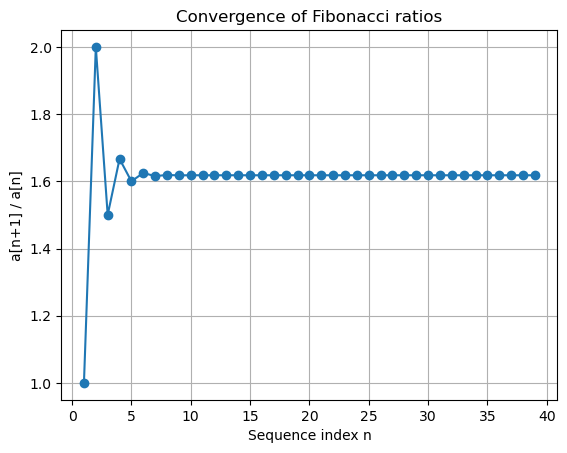

Last 5 ratios: [1.6180339887498896, 1.618033988749897, 1.618033988749894, 1.6180339887498951, 1.6180339887498947]


In [13]:
def fibonacci(a0, a1, N):
    if N < 2:
        raise ValueError("N must be at least 2")
    seq = [a0, a1]
    for _ in range(2, N):
        seq.append(seq[-1] + seq[-2])
    return seq

# Generate sequence
a0 = 1
a1 = 1
N = 40
seq = fibonacci(a0, a1, N)

# Compute ratios
ratios = []
for i in range(len(seq) - 1):
    ratios.append(seq[i+1] / seq[i])

# Plot
plt.figure()
plt.plot(range(1, len(ratios) + 1), ratios, marker="o")
plt.xlabel("Sequence index n")
plt.ylabel("a[n+1] / a[n]")
plt.title("Convergence of Fibonacci ratios")
plt.grid(True)
plt.show()

print("Last 5 ratios:", ratios[-5:])


## A7) Indexing, slicing, and boolean masking

Given the list:

```python
vals = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
```

Do the following:

1.	Using list slicing, create:

    - a = elements with indices 3, 4, 5, 6, 7
    - b = the last 3 elements
    - c = every other element starting from index 0

2.	Convert vals into a NumPy array called arr.
3.	Using boolean masking, create an array d that contains only the elements of arr that are greater than or equal to 50.
4.	Modify arr in place so that all values divisible by 30 are replaced by -1.
5.	Print a, b, c, d, and the modified arr.


Goal: demonstrate correct use of slicing, boolean masks, and in-place array modification.


In [14]:
# TODO: A7
vals = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


In [15]:
# TODO: A7
vals = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

a = vals[3:8]      # [30, 40, 50, 60, 70]
b = vals[-3:]     # [70, 80, 90]
c = vals[::2]     # [0, 20, 40, 60, 80]

arr = np.array(vals)

d = arr[arr >= 50]    # [50, 60, 70, 80, 90]

arr[arr % 30 == 0] = -1   # modifies 0, 30, 60, 90

print("a:", a)
print("b:", b)
print("c:", c)
print("d:", d)
print("arr:", arr)

# Final arr should be:
# [-1, 10, 20, -1, 40, 50, -1, 70, 80, -1]



a: [30, 40, 50, 60, 70]
b: [70, 80, 90]
c: [0, 20, 40, 60, 80]
d: [50 60 70 80 90]
arr: [-1 10 20 -1 40 50 -1 70 80 -1]


## A8) Debugging: fix a buggy function

Fix the buggy RMS function and write 2 tests (hand-checkable + numpy reference).


## A8) String manipulation and formatting

Given the string:

s = "NET.STA.LOC.CHAN"

Do the following:
1.	Use split to break the string into its four components:
- network
- station
- location
- channel
2. Store them in four separate variables and print them.
3. Create a new string called `id1` of the form: STA_CHAN
4. Convert the channel code to lower case and store it in a variable called `chan_lower`.
5. Replace the "." characters in `s` with "/" and store the result in a variable called `path`.
6. Create a formatted string called `summary` of the form "Station STA on network NET has channel CHAN"
7. Print `id1`, `chan_lower`, `path`, and `summary`.
8. Change `s` to "AK.COLA.00.BHZ` and re-run the code.

Goal: demonstrate correct use of split, indexing, string methods, and string formatting.


In [16]:


s = "NET.STA.LOC.CHAN"
s = "AK.COLA.00.BHZ"

# 1. Split into components
parts = s.split(".")
network = parts[0]
station = parts[1]
location = parts[2]
channel = parts[3]

print("network:", network)
print("station:", station)
print("location:", location)
print("channel:", channel)

# 2. Create STA_CHAN
id1 = station + "_" + channel

# 3. Lower-case channel
chan_lower = channel.lower()

# 4. Replace dots with slashes
path = s.replace(".", "/")

# 5. Formatted summary string
summary = f"Station {station} on network {network} has channel {channel}"

# 6. Print results
print("id1:", id1)
print("chan_lower:", chan_lower)
print("path:", path)
print("summary:", summary)


network: AK
station: COLA
location: 00
channel: BHZ
id1: COLA_BHZ
chan_lower: bhz
path: AK/COLA/00/BHZ
summary: Station COLA on network AK has channel BHZ


## A9) List Comprehensions

1. Make a list `sq` of squares of numbers 0..20 using a list comprehension.
2. Make a list `evens` of even numbers 0..50 using a list comprehension (with an if).
3. Print them both out.


In [17]:
# TODO: A9


In [18]:
sq = [i*i for i in range(21)]
evens = [i for i in range(51) if i % 2 == 0]

print("sq[:6]:", sq[:6])
print("evens[:10]:", evens[:10])


sq[:6]: [0, 1, 4, 9, 16, 25]
evens[:10]: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## A10) Sorting with `key=`

Given:
```python
pairs = [("STA1", 3.2), ("STA2", 1.1), ("STA3", 3.2), ("STA4", 2.0)]
```
1. Sort by the second item (magnitude), descending.
2. For ties, sort by station code ascending.
Print the sorted list.


In [19]:
# TODO: A10
pairs = [("STA1", 3.2), ("STA2", 1.1), ("STA3", 3.2), ("STA4", 2.0)]


In [20]:
pairs = [("STA1", 3.2), ("STA2", 1.1), ("STA3", 3.2), ("STA4", 2.0)]
pairs_sorted = sorted(pairs, key=lambda p: (-p[1], p[0]))
print(pairs_sorted)


[('STA1', 3.2), ('STA3', 3.2), ('STA4', 2.0), ('STA2', 1.1)]


In [21]:
def sort_key(p):
    # p is a tuple: (station, value)
    return (-p[1], p[0])

pairs_sorted = sorted(pairs, key=sort_key)
print(pairs_sorted)

[('STA1', 3.2), ('STA3', 3.2), ('STA4', 2.0), ('STA2', 1.1)]


## A11) Strings: parsing and formatting

Given the string:
```python
line = "STA=RCD29, lat=16.72, lon=-62.18, elev_m=120"
```
1. Parse it into a dict with keys: sta, lat, lon, elev_m (values should be correct types).
2. Create a formatted string:
   `"RCD29 at (16.72, -62.18) elev 120 m"`


In [22]:
# TODO: A11
line = "STA=RCD29, lat=16.72, lon=-62.18, elev_m=120"


In [23]:
line = "STA=RCD29, lat=16.72, lon=-62.18, elev_m=120"
parts = [p.strip() for p in line.split(",")]
d = {}
for p in parts:
    k, v = [x.strip() for x in p.split("=", 1)]
    if k.lower() in ("lat", "lon"):
        d[k.lower()] = float(v)
    elif k.lower() == "elev_m":
        d["elev_m"] = int(v)
    elif k.upper() == "STA":
        d["sta"] = v
    else:
        d[k] = v

msg = f'{d["sta"]} at ({d["lat"]:.2f}, {d["lon"]:.2f}) elev {d["elev_m"]} m'
print(d)
print(msg)


{'sta': 'RCD29', 'lat': 16.72, 'lon': -62.18, 'elev_m': 120}
RCD29 at (16.72, -62.18) elev 120 m


## A12) Simple plotting + basic stats (no pandas)

1. Create a new `magnitudes` list, with at least 50 elements, from magnitude 0 to magnitude 6. Make them random.
2. Compute min, max, mean of `magnitudes` using a loop (no NumPy stats helpers).
3. Plot a histogram of `magnitudes` using matplotlib.

To help you, below is the help information for the numpy uniform random distribution function. Can you work out how to use it?

In [24]:
# TODO: A12
help(np.random.uniform)


Help on method uniform in module numpy.random:

uniform(low=0.0, high=1.0, size=None) method of numpy.random.mtrand.RandomState instance
    uniform(low=0.0, high=1.0, size=None)

    Draw samples from a uniform distribution.

    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.

    .. note::
        New code should use the `~numpy.random.Generator.uniform`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.

    Parameters
    ----------
    low : float or array_like of floats, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float or array_like of floats
        Upper boundary of the output interval.  All values generated will be
        less 

min: 0.15009085610370998 max: 5.8494959007954765 mean: 2.7646315719307246


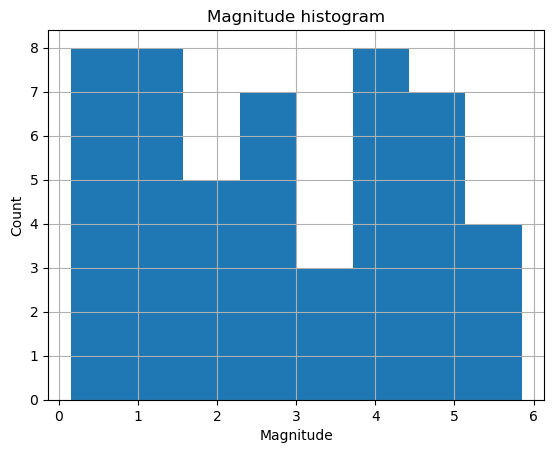

In [25]:
# Use magnitudes from A1 if present; otherwise define a fallback.
magnitudes = np.random.uniform(0.0, 6.0, size=50)

# loop-based stats
mn = float("inf")
mx = float("-inf")
s = 0.0
for m in magnitudes:
    if m < mn:
        mn = m
    if m > mx:
        mx = m
    s += m
mean = s / len(magnitudes)

print("min:", mn, "max:", mx, "mean:", mean)

plt.figure()
plt.hist(magnitudes, bins=8)
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.title("Magnitude histogram")
plt.grid(True)
plt.show()


---
## End
